In [1]:
from typing import Dict, List, Optional, Tuple

import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes
import numpy as np
import pathlib
from utils import read_json, write_json
from collections import defaultdict

from constants import RFID_DATA_FOLDER

In [2]:
automated_testing_folder: pathlib.Path = RFID_DATA_FOLDER / "automated_test"
time_str_tested: pathlib.Path = "20220430-153709"
data_folder: pathlib.Path = automated_testing_folder / time_str_tested

keys: List[str] = [
    "bottom_boxes", 
    "bottom_shelf", 
    "mid_boxes", 
    "mid_shelf", 
    "top_boxes", 
    "top_shelf"
]

In [5]:
print(data_folder)
print(RFID_DATA_FOLDER)

/Users/rashmilpanchani/Documents/Projects/smart_garden/src/rpi_io/sllurp-measurements/data/automated_test/20220430-153709
/Users/rashmilpanchani/Documents/Projects/smart_garden/src/rpi_io/sllurp-measurements/data


In [9]:
def read_data_folder(base_dir: pathlib.Path, keys_list: List[str]) -> Dict[str, dict]: 
    moisture_level_folders: List[pathlib.Path] = [path for path in base_dir.iterdir() if path.is_dir()]
    complete_data: Dict[str, dict] = dict()

    for path in moisture_level_folders:
        if path.name == "automated_test":
            continue
        complete_data[path.name] = dict()
        for file in keys_list:
            data: dict = read_json(path / (file + ".json"))
            complete_data[path.name][file] = data
    
    return complete_data

def read_new_data_folder(base_dir: pathlib.Path, key_list: List[str], moistures: List[str]) -> Dict[str, dict]: 
    # moisture_level_folders: List[pathlib.Path] = [path for path in base_dir.iterdir()]
    complete_data: Dict[str, dict] = dict()

    for mois in moistures:
        name: str = str(mois) + "percent"
        complete_data[name] = dict()
        for file in key_list:
            data: dict = read_json(base_dir / (name + file + ".json"))
            complete_data[name][file] = data
    
    return complete_data

In [10]:
complete_data: Dict[str, dict] = read_data_folder(RFID_DATA_FOLDER, keys)
complete_data_new: Dict[str, dict] = read_new_data_folder(data_folder, ["test2"], ["test2"])

In [11]:
print(complete_data_new)

{'test2percent': {'test2': {'min_Tx_power': {'e280689000000001a33707c4': [31.5, 31.5, 31.5], 'e280689000000001a2fa42ac': [31.5, 31.5, 31.5], 'e280689000000001a2fa42ca': [31.5, 31.5, 31.5], 'e280689000000001a2f9e48e': [31.5, 31.5, 31.5]}, 'rssi_vals': {'e280689000000001a33707c4': {'tag_info': {'tag': 'tag_3', 'EPC-96': 'e280689000000001a33707c4', 'location': 'bottom_front'}, 'peak_rssi': [-66, -66, -59, -58, -60, -56, -60, -64, -59, -60], 'rssi': [-66.0, -66.5, -59.5, -58.0, -60.0, -56.5, -60.5, -64.5, -59.0, -60.5]}, 'e280689000000001a2f9e48e': {'tag_info': {'tag': 'tag_2', 'EPC-96': 'e280689000000001a2f9e48e', 'location': 'rim'}, 'peak_rssi': [-39, -39, -38, -40, -38, -38, -40, -39, -39, -40], 'rssi': [-39.0, -39.0, -38.5, -40.0, -38.5, -38.5, -40.5, -39.0, -39.0, -40.5]}, 'e280689000000001a2fa42ac': {'tag_info': {'tag': 'tag_4', 'EPC-96': 'e280689000000001a2fa42ac', 'location': 'bottom_back'}, 'peak_rssi': [-54, -53, -53, -52, -53, -52, -52, -53, -52, -53], 'rssi': [-54.5, -53.5, -53

In [13]:
print(complete_data.keys())
print(complete_data["0percent"].keys())
print(complete_data["0percent"]["bottom_boxes"].keys())
print(complete_data["0percent"]["bottom_boxes"]["min_Tx_power"].keys())
print(complete_data["0percent"]["bottom_boxes"]["rssi_vals"].keys())
print(complete_data["0percent"]["bottom_boxes"]["rssi_vals"]["e280689000000001a33707c4"].keys())

print(complete_data_new.keys())
print(complete_data_new["test2percent"].keys())
print(complete_data_new["test2percent"]["test2"].keys())
print(complete_data_new["test2percent"]["test2"]["min_Tx_power"].keys())
print(complete_data_new["test2percent"]["test2"]["rssi_vals"].keys())
print(complete_data_new["test2percent"]["test2"]["rssi_vals"]["e280689000000001a33707c4"].keys())

dict_keys(['0percent', '40percent', '8percent', '70percent', '20percent', '80percent', '90percent'])
dict_keys(['bottom_boxes', 'bottom_shelf', 'mid_boxes', 'mid_shelf', 'top_boxes', 'top_shelf'])
dict_keys(['min_Tx_power', 'rssi_vals'])
dict_keys(['e280689000000001a33707c4', 'e280689000000001a2fa42ca', 'e280689000000001a2fa42ac', 'e280689000000001a2f9e48e'])
dict_keys(['e280689000000001a33707c4', 'e280689000000001a2fa42ca', 'e280689000000001a2fa42ac', 'e280689000000001a2f9e48e'])
dict_keys(['tag_info', 'peak_rssi', 'rssi'])
dict_keys(['test2percent'])
dict_keys(['test2'])
dict_keys(['min_Tx_power', 'rssi_vals'])
dict_keys(['e280689000000001a33707c4', 'e280689000000001a2fa42ac', 'e280689000000001a2fa42ca', 'e280689000000001a2f9e48e'])
dict_keys(['e280689000000001a33707c4', 'e280689000000001a2f9e48e', 'e280689000000001a2fa42ac', 'e280689000000001a2fa42ca'])
dict_keys(['tag_info', 'peak_rssi', 'rssi'])


In [54]:
# tag_list = ['e280689000000001a33707c4', 'e280689000000001a2fa42ca', 'e280689000000001a2fa42ac', 'e280689000000001a2f9e48e']
tag_list = ['e280689000000001a33707c4', 'e280689000000001a2f9fb4d', 'e280689000000001a2fa42ac', 'e280689000000001a2f9e48e']
position = "bottom_boxes"
xs = [0, 8, 20, 40, 70, 80, 90]

In [70]:
tag_info: dict = dict()
for i, tag in enumerate(tag_list):
    tag_info[tag] = complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]
print(tag_info)

{'e280689000000001a33707c4': {'tag': 'tag_3', 'EPC-96': 'e280689000000001a33707c4', 'location': 'bottom_front'}, 'e280689000000001a2fa42ca': {'tag': 'tag_1', 'EPC-96': 'e280689000000001a2fa42ca', 'location': 'air'}, 'e280689000000001a2fa42ac': {'tag': 'tag_4', 'EPC-96': 'e280689000000001a2fa42ac', 'location': 'bottom_back'}, 'e280689000000001a2f9e48e': {'tag': 'tag_2', 'EPC-96': 'e280689000000001a2f9e48e', 'location': 'rim'}}


In [65]:
def plot_rssi(position: str) -> Tuple[List[float], List[float], List[float]]:
    global tag_list, complete_data, xs    
    # rssi vals
    rssi_ys = []
    peak_rssi_ys = []
    mrt_ys = []
    for tag in tag_list:
        rssi_readings = []
        peak_rssi_readings = []
        mrt_readings = []
        for mois_level in xs:
            rssi_readings.append(complete_data[f"{mois_level}percent"][position]["rssi_vals"][tag]["rssi"].get("32.5", float('nan')))
            peak_rssi_readings.append(complete_data[f"{mois_level}percent"][position]["rssi_vals"][tag]["peak_rssi"].get("32.5", float('nan')))
            mrt_readings.append(complete_data[f"{mois_level}percent"][position]["min_Tx_power"][tag])
        rssi_ys.append(rssi_readings)
        peak_rssi_ys.append(peak_rssi_readings)
        mrt_ys.append(mrt_readings)

    axes: Optional[Axes] = None 

    fig, axes = plt.subplots(1,3, figsize=(20,5))

    for i, tag in enumerate(tag_list):
        # print(complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
        axes[0].plot(xs, rssi_ys[i], label=complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
    axes[0].set_title("RSSI values")
    axes[0].legend()

    for i, tag in enumerate(tag_list):
        # print(complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
        axes[1].plot(xs, peak_rssi_ys[i], label=complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
    axes[1].set_title("Peak RSSI values")
    axes[1].legend()
    
    for i, tag in enumerate(tag_list):
        # print(complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
        axes[2].plot(xs, mrt_ys[i], label=complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
    axes[2].set_title("Minimum Response Threshold")
    axes[2].legend()
    # fig.show()
    plt.suptitle(position)
    return rssi_ys, peak_rssi_ys, mrt_ys

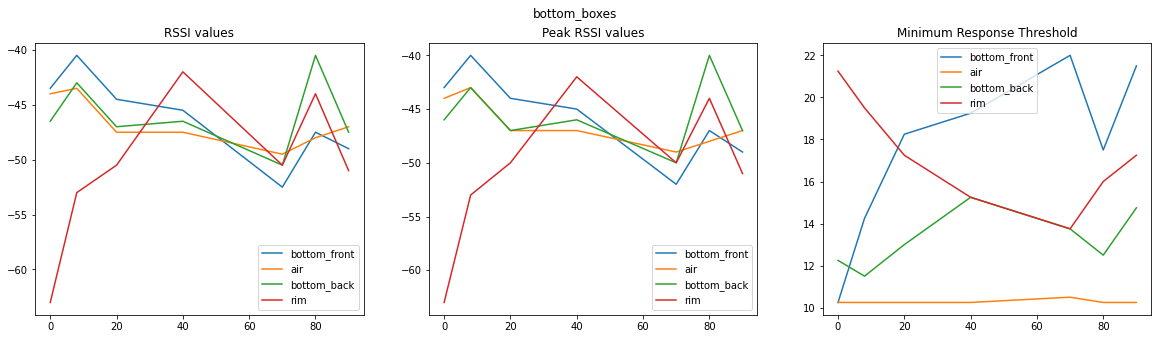

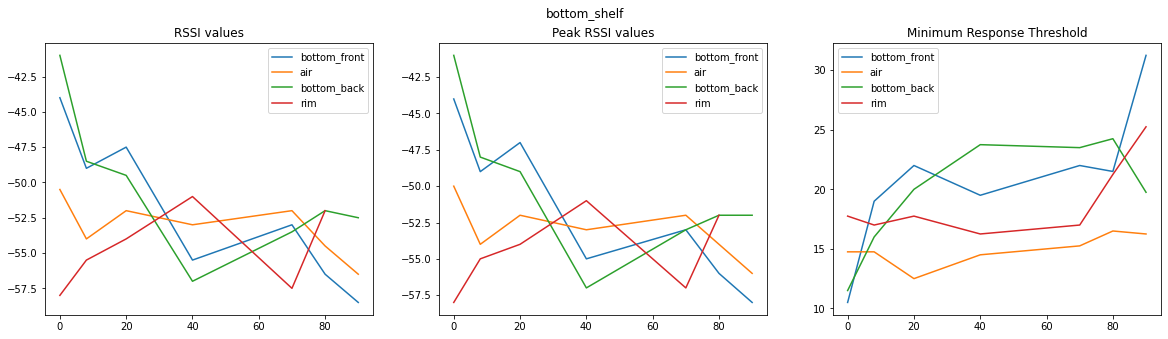

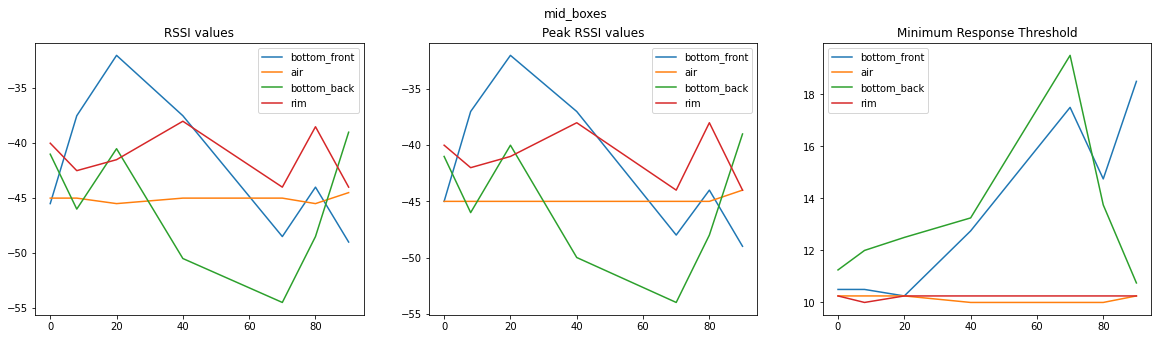

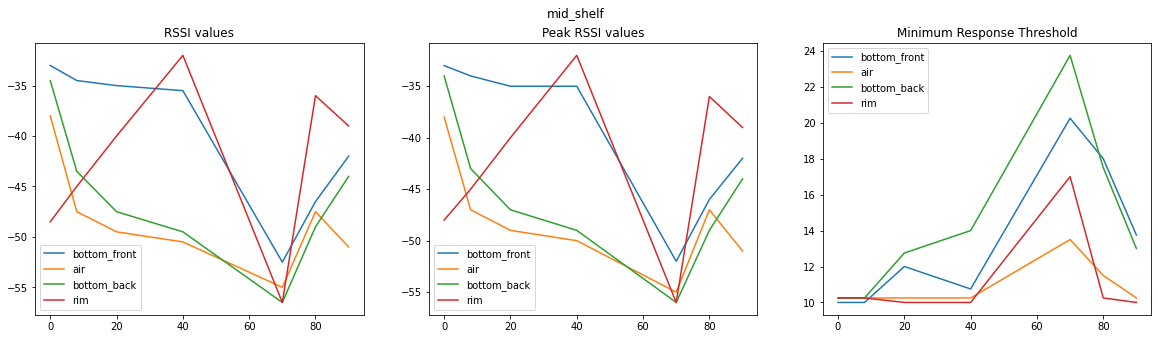

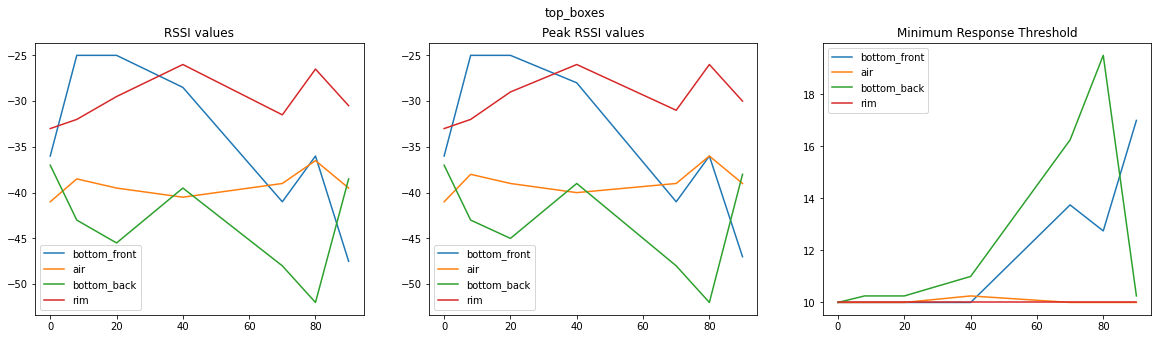

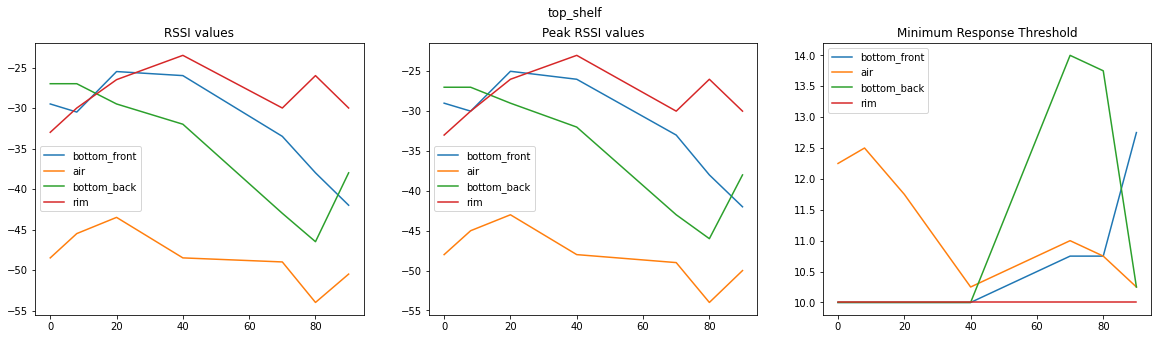

In [67]:
compiled_rssi_readings: Dict[str, dict] = defaultdict(dict)

for key in keys:
    rssi_readings: tuple = plot_rssi(key)
    rssi_ys: np.ndarray = np.array(rssi_readings[0])
    peak_rssi_ys: np.ndarray = np.array(rssi_readings[1])
    mrt_ys: np.ndarray = np.array(rssi_readings[2])
    compiled_rssi_readings[key] = {
        "rssi": rssi_ys,
        "peak_rssi": peak_rssi_ys,
        "mrt": mrt_ys
    }
# plot_rssi("bottom_shelf")
# print("Mid")
# plot_rssi("mid_boxes")
# plot_rssi("mid_shelf")
# print("Top")
# plot_rssi("top_boxes")
# plot_rssi("top_shelf")

In [68]:
compiled_rssi_readings

defaultdict(dict,
            {'bottom_boxes': {'rssi': array([[-43.5, -40.5, -44.5, -45.5, -52.5, -47.5, -49. ],
                     [-44. , -43.5, -47.5, -47.5, -49.5, -48. , -47. ],
                     [-46.5, -43. , -47. , -46.5, -50.5, -40.5, -47.5],
                     [-63. , -53. , -50.5, -42. , -50.5, -44. , -51. ]]),
              'peak_rssi': array([[-43, -40, -44, -45, -52, -47, -49],
                     [-44, -43, -47, -47, -49, -48, -47],
                     [-46, -43, -47, -46, -50, -40, -47],
                     [-63, -53, -50, -42, -50, -44, -51]]),
              'mrt': array([[10.25, 14.25, 18.25, 19.25, 22.  , 17.5 , 21.5 ],
                     [10.25, 10.25, 10.25, 10.25, 10.5 , 10.25, 10.25],
                     [12.25, 11.5 , 13.  , 15.25, 13.75, 12.5 , 14.75],
                     [21.25, 19.5 , 17.25, 15.25, 13.75, 16.  , 17.25]])},
             'bottom_shelf': {'rssi': array([[-44. , -49. , -47.5, -55.5, -53. , -56.5, -58.5],
                     [-50.5

In [69]:
bottom_boxes_mrt: np.ndarray = compiled_rssi_readings["bottom_boxes"]["mrt"]